
# [KDT] ch5 Linear Regression

### 단일회귀 / 다중회귀 / 특성공학
 - 데이터셋: 직장인 연봉 정보 / 보스톤집값 / 공유자전거 플랫폼 / 다이아몬드 
 - 주요 라이브러리: statsmodels ols / sklearn linear_model / sklearn train_test_split / 
 - 알파 퀴즈(1개) / 파이 퀴즈(1개) / 시그마 퀴즈(2개) / 오메가 퀴즈(과제 1개) 

In [16]:
import os
os.getcwd()

'C:\\Users\\하정수\\TIL\\Machine Learning'

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
# 파일 로딩 
df_hk = pd.read_csv('.\\data\\hk_221206.csv')

In [20]:
df_hk[:5]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015


## $\alpha$(알파) 퀴즈:
전체 소득 대비 소비액 비율을 나타내는 합성 변수('expenditure_per_salary')를 만들고자 한다. 
<br> 수식 : expenditure_per_salary = expenditure / salary 
<br> expenditure_per_salary 합성변수를 만들고 해당 변수의 Company 그룹별 평균을 구하시오 

In [21]:
df = df_hk.copy()
df['expenditure_per_salary'] = df['expenditure'] / df['salary']
df['expenditure_per_salary'].groupby(df['company']).mean()
df.groupby('company')['expenditure_per_salary'].mean()

company
A    0.765371
B    0.751797
C    0.790910
Name: expenditure_per_salary, dtype: float64


## 1-1. 단일 회귀 statemodels - ols()

연봉으로 지출액을 예측할 수 있을까 ?

In [22]:
# statemodels - ols() 클래스 호출
from statsmodels.formula.api import ols  # formula 형식
from statsmodels.formula.api import ols?

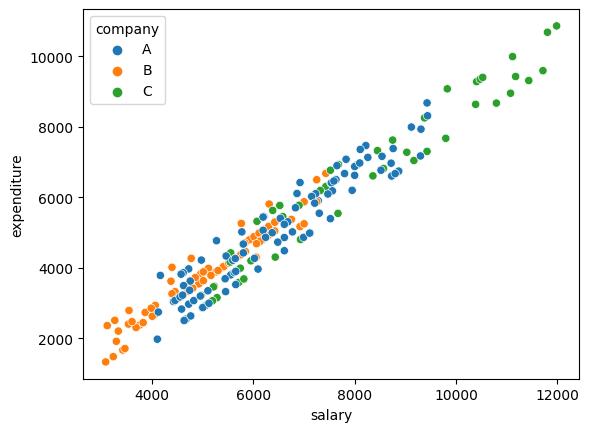

In [23]:
# 시각화 (x="salary", y="expenditure")
sns.scatterplot( x="salary", y="expenditure", data = df, hue= 'company')
plt.show()

In [24]:
# 독립변수, 종속변수 상관계수 확인
df[['expenditure', 'salary']].corr()

,expenditure,salary
expenditure,1.000000,0.972185
salary,0.972185,1.000000


In [25]:
# 모델선택, 독립변수(salary), 종속변수(expenditure) 입력, fit
from statsmodels.formula.api import ols
model1_1 = ols(formula = 'expenditure ~ salary', data = df).fit()

In [26]:
# Attribute 확인
model1_1.~~~

SyntaxError: invalid syntax (331190275.py, line 2)

In [27]:
# 모델 summary 결정계수 / 회귀 계수(coef) 등 확인 
model1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            expenditure   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     4273.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          2.40e-158
Time:                        09:52:02   Log-Likelihood:                -1873.6
No. Observations:                 250   AIC:                             3751.
Df Residuals:                     248   BIC:                             3758.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1246.9920     99.061    -12.588      0.000   -1442.100   -1051.884
salary         0.9781      0.015     65.367      0.000       0.949       1.008
==============================================================================
Omnibus:                        9.379   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                5.059
Skew:                          -0.130   Prob(JB):                       0.0797
Kurtosis:                       2.354   Cond. No.                     2.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## $$y= 0.9781 \times x - 1246.9920$$

In [28]:
# model1_1 attributes (params, predict, resid 잔차)
model1_1.params, model1_1.params[0], model1_1.params[1], model1_1.resid[:5]

(Intercept   -1246.992024
 salary          0.978135
 dtype: float64,
 -1246.992024494655,
 0.9781347364827975,
 0   -788.360395
 1   -399.803932
 2     31.171143
 3    210.764994
 4    967.980531
 dtype: float64)

In [29]:
# 회귀식
def linear1_1(x):
    return(model1_1.params[1] * x + model1_1.params[0])

In [30]:
# sample data
df[:2]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,expenditure_per_salary
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,0.481707
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,0.629237


In [31]:
# 회귀식으로 예측값 확인
linear1_1(df[:2]['salary'])

0    2763.360395
1    3369.803932
Name: salary, dtype: float64

In [32]:
# sample data
df[:5]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,expenditure_per_salary
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,0.481707
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,0.629237
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,0.811126
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,0.722906
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,0.914579


In [33]:
# predict로 예측값 확인
predict1_1 = model1_1.predict(exog=df['salary'])

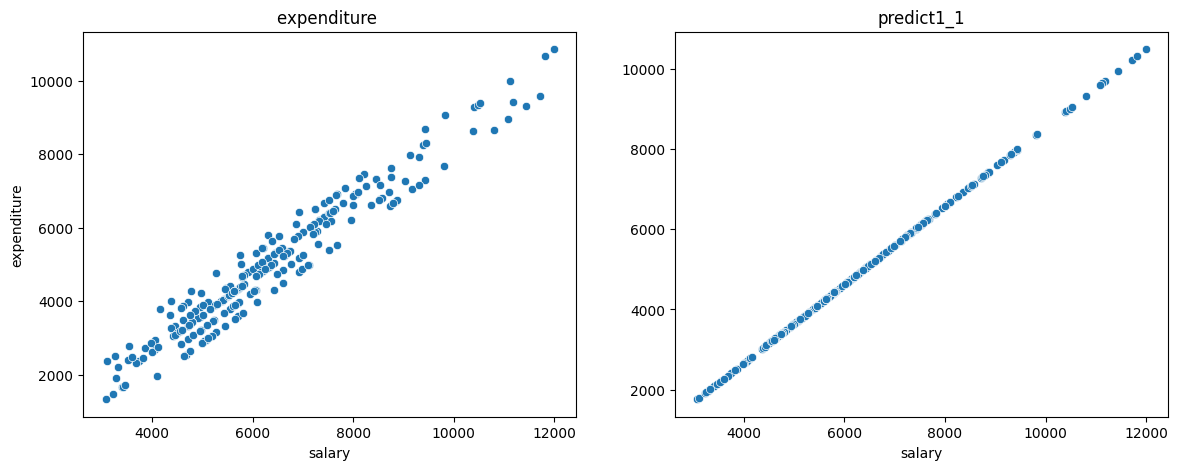

In [34]:
# 시각화 

fig, ax = plt.subplots( nrows= 1, ncols=2, figsize=(14, 5))
sns.scatterplot(x=df['salary'], y=df['expenditure'], palette='Set1', ax=ax[0])
sns.scatterplot(x=df['salary'], y=predict1_1, palette='Set2', ax=ax[1])

ax[0].set_title('expenditure ')
ax[1].set_title('predict1_1')
plt.show()

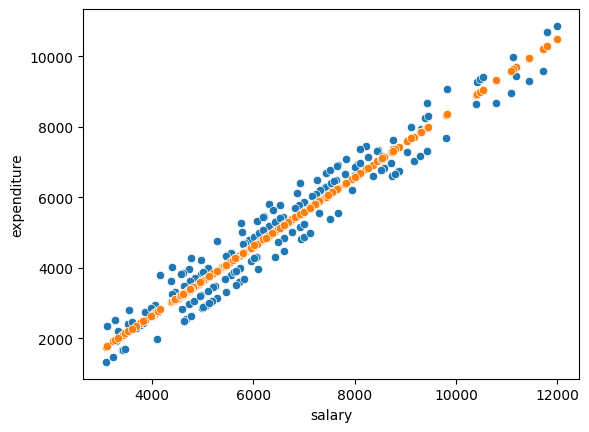

In [35]:
sns.scatterplot(x=df['salary'], y=df['expenditure'])
sns.scatterplot(x=df['salary'], y=predict1_1)
plt.show()

## 다중 회귀 가정 4가지 선형성, 정규성, 등분산, 독립성

### 선형 회귀 가정 1: 선형성 

F 검정의 pvalue로 확인

<AxesSubplot: xlabel='salary'>

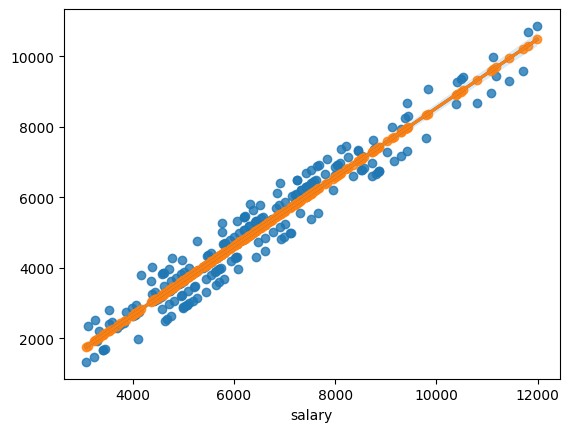

In [36]:
# 선형회귀 그래프, regplot: scatter plot, regression line, confidence band를 한 번에 그리는 기능
sns.regplot(x='salary', y='expenditure', data=df)
sns.regplot(x=df['salary'], y=predict1_1)

In [37]:
# F 검정의 pvalue로 확인
model1_1.f_pvalue
model1_1.f_pvalue < 0.05

True

### 선형 회귀 가정 2: 잔차의 정규성

<br>잔차 그래프로 확인
<br>shapiro 의 경우 p값이 0.05 이상이면 정규성 만족한다 

In [38]:
# 잔차 계산
residual = df['expenditure'] - predict1_1
residual

0     -788.360395
1     -399.803932
2       31.171143
3      210.764994
4      967.980531
          ...    
245   -725.169784
246   -722.545952
247     46.914133
248     63.531733
249     35.325543
Length: 250, dtype: float64

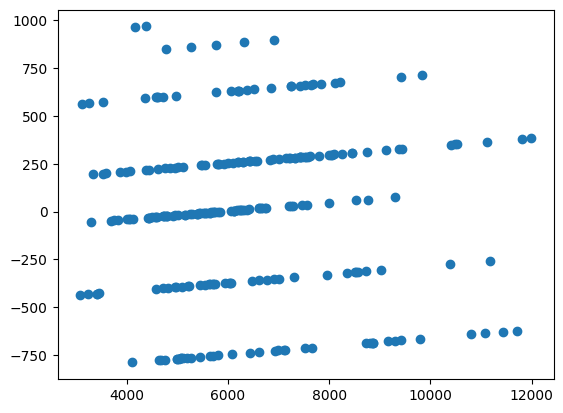

In [39]:
# 잔차 그래프 1
plt.scatter(df['salary'], residual)
plt.show()

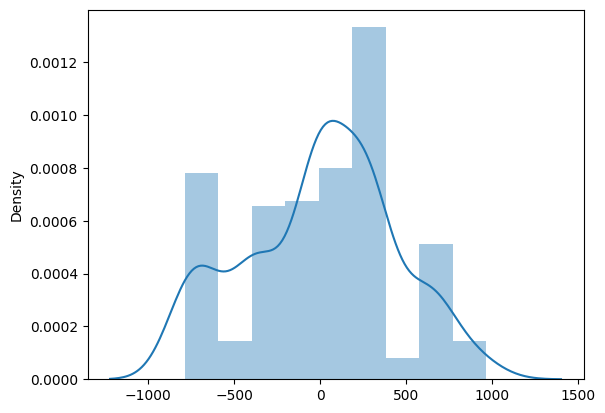

In [40]:
# 잔차 그래프 2
sns.distplot(residual)
plt.show()

In [41]:
# shapiro 정규성 검정, Ho: 정규성을 가진다 (p-value > 0.05)
from scipy.stats import shapiro

shapiro(residual)

ShapiroResult(statistic=0.9549193382263184, pvalue=5.075988269709342e-07)

In [42]:
# pvalue가 0.05보다 작으면 정규성 만족 못함
shapiro(residual)[1] < 0.05

True

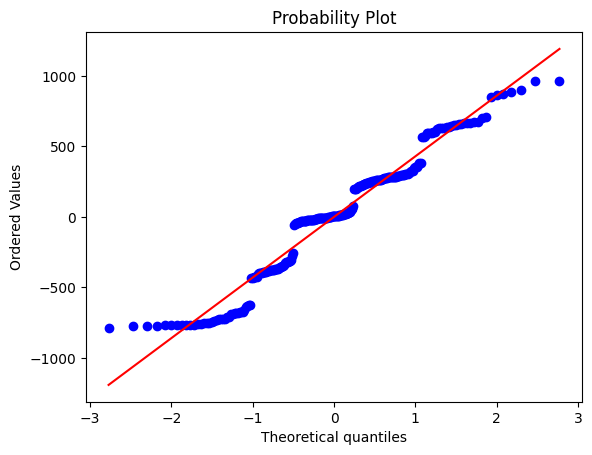

In [43]:
# residual이 그룹화 되어 있어 shapiro test에서 정규성이 안 나옴

import scipy.stats as stats

stats.probplot(residual, plot=plt)
plt.show()

## 선형 회귀 가정 3: 잔차의 등분산

예측값과 잔차의 산점도로 파악

<AxesSubplot: >

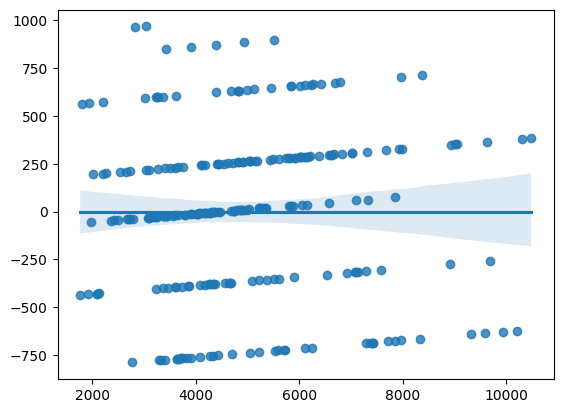

In [44]:
# 잔차그래프로 확인, X가 커질때 잔차의 간격이 변하면 안됨, 간격아 일정하면 등분산성 만족
sns.regplot(x=predict1_1, y=residual)

## 선형 회귀 가정 4: 잔차의 독립성
잔차가 독립인지(자기상관성이 있는지) 검정

In [45]:
#perform Durbin-Watson test

from statsmodels.stats.stattools import durbin_watson
durbin_watson(model1_1.resid)

# 더빈 왓슨 통계량은 0 ~ 4사이의 값을 갖을 수 있음
# 0에 가까울수록 → 양의 상관관계
# 4에 가까울수록 → 음의 상관관계
# 2에 가까울수록 → 오차항의 자기상관이 없음

1.8401707978491966

## 1-2. 단일 회귀 sklearn.linear_model

연봉으로 지출액을 예측할 수 있을까 ?

In [46]:
# LinearRegression 호출
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression?

In [47]:
df['salary']

0      4100
1      4720
2      7280
3      4060
4      4390
       ... 
245    6990
246    7110
247    8000
248    8760
249    7470
Name: salary, Length: 250, dtype: int64

In [48]:
df[['salary']]

,salary
0,4100
1,4720
2,7280
3,4060
4,4390
...,...
245,6990
246,7110
247,8000
248,8760


In [49]:
# 모델선택, 독립변수(salary), 종속변수(expenditure) 입력, fit 

model1_2 = LinearRegression(fit_intercept=True).fit(X=df[['salary']], y=df['expenditure'])

In [50]:
# 회귀계수 확인
model1_2.coef_

array([0.97813474])

In [51]:
# intercept_ 확인
model1_2.intercept_

-1246.9920244946543

## $$y= 0.97813 \times x - 1246.9920$$

In [52]:
# 회귀식
def linear1_2(x):
    return (model1_2.coef_[0] * x) + model1_2.intercept_

In [53]:
# sample data
df[:5]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,expenditure_per_salary
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,0.481707
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,0.629237
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,0.811126
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,0.722906
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,0.914579


In [54]:
# 회귀식으로 예측
linear1_2(df['salary'][:5])

0    2763.360395
1    3369.803932
2    5873.828857
3    2724.235006
4    3047.019469
Name: salary, dtype: float64

In [55]:
# predict로 예측
predict1_2 = model1_2.predict(df[['salary']])
predict1_2[:5]

array([2763.36039508, 3369.8039317 , 5873.8288571 , 2724.23500563,
       3047.01946866])

<AxesSubplot: xlabel='salary'>

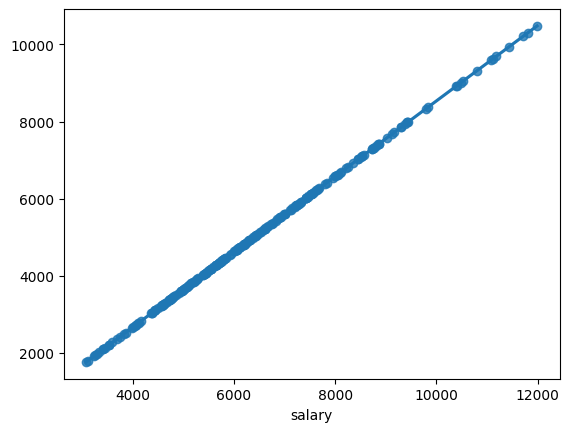

In [56]:
# 선형회귀 그래프
sns.regplot(x=df['salary'], y=predict1_2)

## statemodels vs. sklearn 비교 
 - statemodels는 통계기반 강점, summary 표등 통계자료 보기 편함 
 - sklearn는 머신러닝 관점
 - 입력값의 차이( statemodels ols의 경우 formula 문법이 있음 / sklearn는 fit() 활용) 

In [57]:
# statemodels vs. sklearn 제공 기능 비교

# model1_1.   # 통계 중심
# model1_2.   # 머신러닝 중심

## 1-3. 단일 회귀 train_test_split / statemodels - ols()

train, test data 분할 (train_size= 0.7, random_state=123)
<br> 연봉으로 지출액을 예측할 수 있을까 ?

In [58]:
# train_test_split (train_size= 0.7, random_state=123)
from sklearn.model_selection import train_test_split
df_train1, df_test1 = train_test_split(df, train_size=0.7, random_state=123)
print('데이터셋 총합 :', len(df), ', df_train :', len(df_train1), ', df_test :', len(df_test1))
df_train1[:5]

데이터셋 총합 : 250 , df_train : 175 , df_test : 75


,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,expenditure_per_salary
193,hkd48,780113-1,M,184.0,43,AB,A,C,6530,5405,0.827718
243,hkd93,730719-1,M,180.4,48,AB,A,B,7560,6185,0.818122
152,hkd236,860621-1,M,166.2,35,A,C,B,10410,9285,0.891931
184,hkd4,960809-1,M,177.6,25,O,A,B,4450,3075,0.691011
190,hkd45,811022-1,M,182.1,40,B,A,C,5800,4675,0.806034


In [59]:
# ols 모델링, fit
from statsmodels.formula.api import ols
model1_3 = ols(formula='expenditure ~ salary', data = df_train1).fit()
model1_3

In [60]:
# summary, 회귀계수 확인
model1_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            expenditure   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     3453.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          3.14e-116
Time:                        09:52:10   Log-Likelihood:                -1306.3
No. Observations:                 175   AIC:                             2617.
Df Residuals:                     173   BIC:                             2623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1278.0961    110.539    -11.562      0.000   -1496.275   -1059.917
salary         0.9799      0.017     58.760      0.000       0.947       1.013
==============================================================================
Omnibus:                        5.448   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                3.336
Skew:                          -0.140   Prob(JB):                        0.189
Kurtosis:                       2.385   Cond. No.                     2.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## $$y= 0.9799 \times x - 1278.0961$$

In [61]:
# model1_3 과 model1_1.summary()와 비교, coef_, R-squared, train data set이 바뀌었음
model1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            expenditure   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     4273.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          2.40e-158
Time:                        09:52:10   Log-Likelihood:                -1873.6
No. Observations:                 250   AIC:                             3751.
Df Residuals:                     248   BIC:                             3758.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1246.9920     99.061    -12.588      0.000   -1442.100   -1051.884
salary         0.9781      0.015     65.367      0.000       0.949       1.008
==============================================================================
Omnibus:                        9.379   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                5.059
Skew:                          -0.130   Prob(JB):                       0.0797
Kurtosis:                       2.354   Cond. No.                     2.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
# 회귀식 y = 0.9799 * salary - 1278.0961

model1_3.params[1] * 7520 + model1_3.params[0]
#0.9799 * 5620 - 1278.0961

6090.600256122475

In [63]:
# predict로 예측
model1_3.predict(df_test1[['salary']])

127    6090.600256
187    4228.828570
24     4268.023763
206    2798.204010
235    4258.224965
          ...     
128    5512.471153
132    7119.474083
167    5355.690380
217    3258.747533
50     3542.912685
Length: 75, dtype: float64

## 1-4. $\pi$(파이) Quiz 단일회귀 train_test_split / statemodels - ols() 


<br>나이로 연봉을 예측할 수 있을까 ? 
<br>독립변수: 나이(age)
<br>종속변수: 연봉(salary)

<br>1. train, test data 분할하시오(train_size= 0.7, random_state=123)
<br>2. 회귀식을 수립하시오
<br>3. 37세의 연봉을 예측하시오

In [148]:
# train_test_split (train_size= 0.7, random_state=123)
df_train1, df_test1 = train_test_split(df, train_size= 0.7, random_state=123)

In [149]:
# ols모델링, fit
from statsmodels.formula.api import ols
model1_4 = ols(formula='salary ~ age', data=df_train1).fit()

In [151]:
# summary, 회귀계수 확인
model1_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     67.46
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           4.83e-14
Time:                        16:37:46   Log-Likelihood:                -1543.0
No. Observations:                 175   AIC:                             3090.
Df Residuals:                     173   BIC:                             3096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1821.4088    564.336      3.228      0.001     707.539    2935.278
age          115.2576     14.033      8.213      0.000      87.559     142.956
==============================================================================
Omnibus:                       56.938   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.516
Skew:                           1.578   Prob(JB):                     1.66e-24
Kurtosis:                       5.249   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## $$y= 115.2576 \times x + 1821.4088$$

In [ ]:
# 회귀식으로 예측 y = 115.2576 * age + 1821.4088
115.2576 * ? + 1821.4088
115.2576 * ? + 1821.4088

In [158]:
model1_4.params[1]*37 + model1_4.params[0]

6085.940191437446

In [ ]:
# predict 개별값 입력으로 예측


In [179]:
a = pd.DataFrame({'age':[37]})
model1_4.predict(a)

0    6085.940191
dtype: float64

In [185]:
b = pd.DataFrame([37], columns=['age'])
model1_4.predict(b)

0    6085.940191
dtype: float64

In [190]:
# predict 전체값 예측
predict1_4 = model1_4.predict(df_test1['age'])

127    5279.136947
187    6085.940191
24     6201.197798
206    4933.364127
235    6546.970617
          ...     
128    5394.394553
132    5855.424979
167    7123.258649
217    5048.621734
50     5970.682585
Length: 75, dtype: float64

<AxesSubplot: xlabel='age', ylabel='salary'>

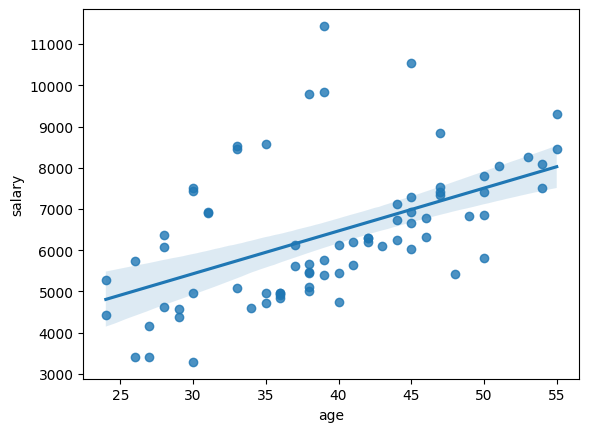

In [186]:
# 선형회귀 그래프
sns.regplot(x='age', y='salary', data=df_test1)

## 1-5.  $\pi$(파이) Quiz 단일회귀 train_test_split /  sklearn.linear_model


<br>나이로 연봉을 예측할 수 있을까 ?  
<br>독립변수: 나이(age)
<br>종속변수: 연봉(salary)

train, test data 분할하고 37세의 연봉을 예측하시오

In [15]:
# train_test_split (train_size= 0.7, random_state=123)
df_train1, df_test1 = train_test_split(df, train_size= 0.7, random_state=123)

NameError: name 'train_test_split' is not defined

In [200]:
# LinearRegression, fit, predict
from sklearn.linear_model import LinearRegression
model1_5 = LinearRegression().fit(X = df_train1[['age']], y = df_train1['salary'])
model1_5

LinearRegression()

In [198]:
a = pd.DataFrame({'age':[37]})
model1_5.predict(a)

array([6085.94019144])

In [202]:
predict1_5 = model1_5.predict(df_test1[['age']])
predict1_5[:5]

array([5279.13694659, 6085.94019144, 6201.19779784, 4933.36412737,
       6546.97061706])

## 1-6. 단일회귀 train_test_split /  statsmodels.api 

In [205]:
# statsmodels.api
import statsmodels.api as sm
from statsmodels.formula.api import ols

sm.OLS?

# train, fit
model_sm = sm.OLS(endog = df_train1['salary'], exog = sm.add_constant(df_train1[['age']])).fit()
# model_sm = sm.OLS(endog = df_train1['salary'], exog = df_train1[['age']]).fit() -> 상수항 없는 경우
model_sm

In [208]:
# predict
predict_sm = model_sm.predict(sm.add_constant(df_test1[['age']]))

In [206]:
# summary()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     67.46
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           4.83e-14
Time:                        17:17:29   Log-Likelihood:                -1543.0
No. Observations:                 175   AIC:                             3090.
Df Residuals:                     173   BIC:                             3096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1821.4088    564.336      3.228      0.001     707.539    2935.278
age          115.2576     14.033      8.213      0.000      87.559     142.956
==============================================================================
Omnibus:                       56.938   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.516
Skew:                           1.578   Prob(JB):                     1.66e-24
Kurtosis:                       5.249   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2-1. 다중회귀 statemodels -ols()

연봉과 나이로 지출액을 예측할 수 있을까
<br> train, test data 분할
<br> 종속변수 : 지출액 (expenditure)
<br> 독립변수 : 연봉과 나이 (age , salary)

In [218]:
# ols 다중회귀 모델링, fit
model2_1 = ols(formula='expenditure~age+salary', data=df_train1).fit()
model2_1

In [219]:
# summary
model2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            expenditure   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1853.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):          4.36e-117
Time:                        17:26:13   Log-Likelihood:                -1299.9
No. Observations:                 175   AIC:                             2606.
Df Residuals:                     172   BIC:                             2615.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1633.1811    145.299    -11.240      0.000   -1919.980   -1346.382
age           14.9256      4.137      3.608      0.000       6.760      23.091
salary         0.9436      0.019     49.632      0.000       0.906       0.981
==============================================================================
Omnibus:                        1.753   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.495
Skew:                          -0.073   Prob(JB):                        0.474
Kurtosis:                       2.571   Cond. No.                     3.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [224]:
# attribute 확인
model2_1.params

Intercept   -1633.181087
age            14.925566
salary          0.943551
dtype: float64

## $$y= 14.9256 \times x_1  + 0.9436 \times x_2 - 1633.1811$$

In [220]:
df_test1.head(1)

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,expenditure_per_salary
127,hkd213,910216-2,F,158.3,30,B,C,C,7520,6770,0.900266


In [221]:
# 회귀식, hkd213에 대입 나이 30 / 연봉 7520
14.9256 * 30 + 0.9436 * 7520 - 1633.1811

5910.4589000000005

In [226]:
# predict 예측
predict2_1 = model2_1.predict(exog=df_test1[['age', 'salary']])
predict2_1[:5]

127    5910.092828
187    4221.824034
24     4274.491658
206    2694.983249
235    4309.832843
dtype: float64

In [228]:
# attribute로 확인
model2_1.params, model2_1.params[0], model2_1.params[1], model2_1.params[2]

(Intercept   -1633.181087
 age            14.925566
 salary          0.943551
 dtype: float64,
 -1633.1810866712706,
 14.9255664563031,
 0.9435514522157465)

In [230]:
# 회귀식에 attribute값 대입, (나이 30 / 연봉 7520)
model2_1.params[1] * 30 + model2_1.params[2] * 7520 + model2_1.params[0]

5910.092827680237

## 다중회귀 2-2 sklearn.linear_model 

<br> 연봉과 지출액으로 나이를 예측할 수 있을까
<br> train, test data 분할
<br> 독립변수: salary, expenditure
<br> 종속변수: age

In [65]:
# LinearRegression, fit, predict
from sklearn.linear_model import LinearRegression
model2_2 = LinearRegression().fit(X = df_train1[['salary', 'expenditure']], y = df_train1['age'])
model2_2
predict2_2 = model2_2.predict(X=df_test1[['salary', 'expenditure']])
predict2_2[:5]

array([45.29627698, 35.77791435, 37.64667625, 38.56708813, 34.08616908])

In [255]:
# intercept_, coef_확인
model2_2.intercept_, model2_2.coef_, model2_2.feature_names_in_

(array([29.81485204]),
 array([[-0.00218482,  0.00471363]]),
 array(['salary', 'expenditure'], dtype=object))

In [66]:
# 변수별 회귀계수 확인하는 데이터프레임
pd.DataFrame({'feature': model2_2.feature_names_in_, 'coef':model2_2.coef_})

,feature,coef
0,salary,-0.002185
1,expenditure,0.004714


## 2-3 선형회귀 모형 명목형 변수의 처리
get_dummy ('gender', 'blood_type', 'company', 'grades')

In [267]:
# 해당 column만 get_dummies
df[['gender', 'blood_type', 'company', 'grades']][:5]

,gender,blood_type,company,grades
0,F,A,A,A
1,F,A,A,B
2,F,A,A,B
3,F,AB,B,B
4,M,O,B,F


In [276]:
pd.get_dummies(data=df[['gender', 'company']])[:5]

,gender_F,gender_M,company_A,company_B,company_C
0,1,0,1,0,0
1,1,0,1,0,0
2,1,0,1,0,0
3,1,0,0,1,0
4,0,1,0,1,0


In [8]:
# 전체 column + 해당 column, 원본 column은 삭제됨
df_dummy = pd.get_dummies(data=df, columns=['gender', 'company'])   # dfop_first = True
df_dummy[:5]

,name,jumin7,height,age,blood_type,grades,salary,expenditure,expenditure_per_salary,gender_F,gender_M,company_A,company_B,company_C
0,hkd1,990623-2,161.9,22,A,A,4100,1975,0.481707,1,0,1,0,0
1,hkd10,900303-2,169.4,31,A,B,4720,2970,0.629237,1,0,1,0,0
2,hkd100,681205-2,168.3,55,A,B,7280,5905,0.811126,1,0,1,0,0
3,hkd101,931226-2,155.3,28,AB,B,4060,2935,0.722906,1,0,0,1,0
4,hkd102,920123-1,188.6,29,O,F,4390,4015,0.914579,0,1,0,1,0


## 2-4 다중회귀 sklearn.linear_model 

회사와(company, 범주형) 연봉(salary, 연속형)으로 지출액(expenditure)을 예측할 수 있을까 ?

In [10]:
# LinearRegression, fit, predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

model2_4 = LinearRegression().fit(X = df_dummy[['company_A', 'company_B', 'company_C', 'salary']], y = df_dummy['expenditure'])
model2_4
predict2_4 = model2_4.predict(df_dummy[['company_A', 'company_B', 'company_C', 'salary']])
predict2_4[:5]

array([2622.85611109, 3251.40274107, 5846.69205195, 2790.76899332,
       3125.31800605])

In [12]:
# attribute 확인(coef, intercept)
model2_4.feature_names_in_, model2_4.coef_, model2_4.intercept_

(array(['company_A', 'company_B', 'company_C', 'salary'], dtype=object),
 array([ -30.55321087,  177.91106684, -147.35785597,    1.01378489]),
 -1503.1087149966024)

In [14]:
# feature, coef DataFrame화
pd.DataFrame({'feature':model2_4.feature_names_in_, 'coef':model2_4.coef_})

,feature,coef
0,company_A,-30.553211
1,company_B,177.911067
2,company_C,-147.357856
3,salary,1.013785


## $$y= -30.55 \times x_1  + 177.91 \times x_2 -147.36 \times x_3 + 1.01 \times x_4 - 1503.1087$$

## 3-1 선형회귀 모델의 평가

MSE, RMSE, MAE, RMAE

In [68]:
# df_train1, df_test1
from sklearn.model_selection import train_test_split
df_train1, df_test1 = train_test_split(df, train_size= 0.7, random_state=123)

<AxesSubplot: xlabel='salary', ylabel='expenditure'>

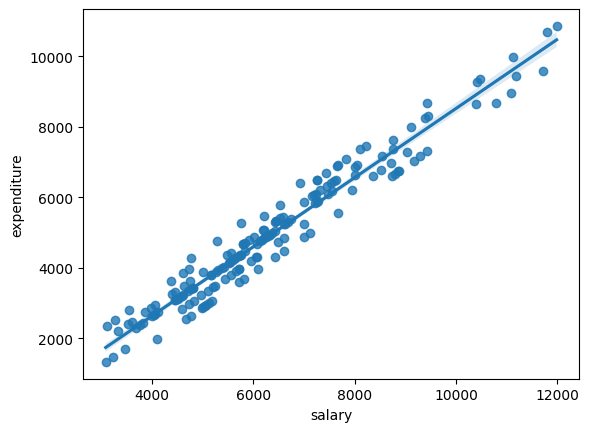

In [69]:
# 평가를 위한 시각화 (x='salary', y='expenditure')
sns.regplot(x='salary', y='expenditure', data=df_train1) # 평가는 회귀식과 실제값이 잘 맞는가

<AxesSubplot: xlabel='age', ylabel='expenditure'>

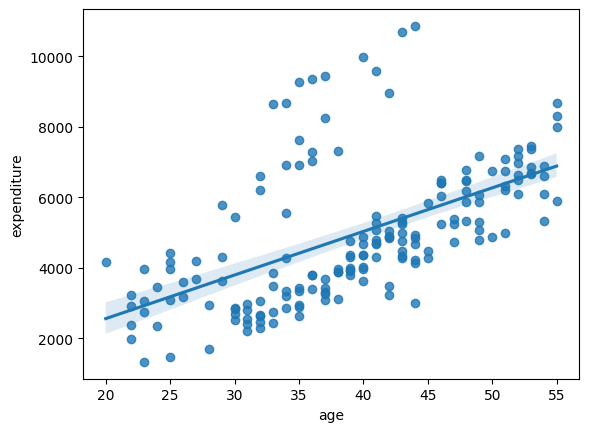

In [70]:
# 평가를 위한 시각화 (x='age', y='expenditure')
sns.regplot(x='age', y='expenditure', data=df_train1)  # 그래프로 보면 age가 불리해 보임

In [72]:
# LinearRegression (salary, expenditure)
from sklearn.linear_model import LinearRegression
model_salary = LinearRegression().fit(X = df_train1[['salary']], y = df_train1['expenditure'])
predict_salary = model_salary.predict(X = df_test1[['salary']])

In [74]:
# LinearRegression (age, expenditure)
from sklearn.linear_model import LinearRegression
model_age = LinearRegression().fit(X = df_train1[['age']], y = df_train1['expenditure'])
predict_age = model_age.predict(X = df_test1[['age']])

<AxesSubplot: ylabel='expenditure'>

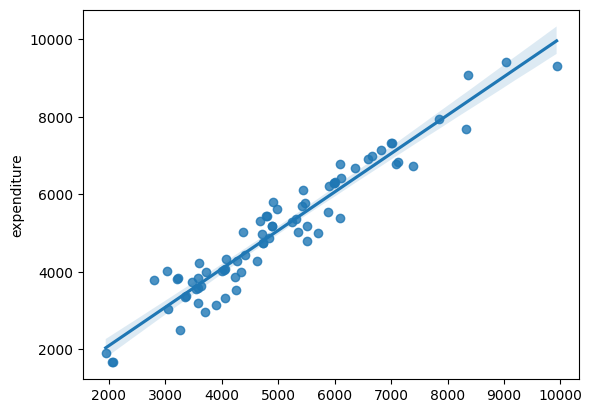

In [75]:
# predict_salary 시각화
sns.regplot(x=predict_salary, y=df_test1['expenditure'])

<AxesSubplot: ylabel='expenditure'>

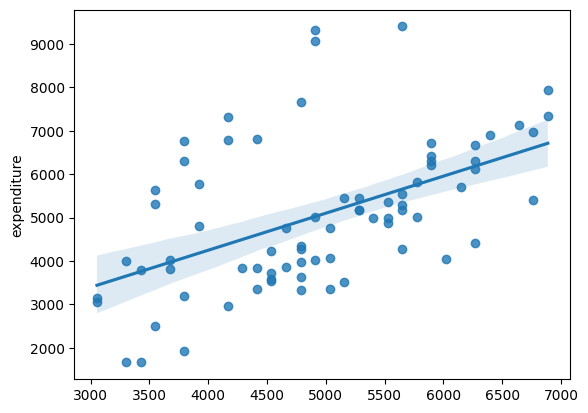

In [76]:
# predict_age 시각화
sns.regplot(x=predict_age, y=df_test1['expenditure'])

In [77]:
# LinearRegression 평가를 위한 class
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Mean Absolute Error(MAE) : $$\frac{1}{N}\sum_{i=1}^{n}|y_i-\hat{y}|$$

In [82]:
# Mean Absolute Error(MAE) 계산식
abs(df_test1['expenditure'] - predict_salary).sum()
(df_test1['expenditure'] - predict_salary).abs().sum()/len(df_test1)

376.86984466963224

In [83]:
# mean_absolute_error class 활용 (predict_salary)
mean_absolute_error(df_test1['expenditure'], predict_salary)

376.86984466963224

In [84]:
# mean_absolute_error class 활용 (predict_age)
mean_absolute_error(df_test1['expenditure'], predict_age)

1037.0895563016563

### Mean Squared Error(MSE): $$\frac{1}{N}\sum_{i=1}^{n}(y_i-\hat{y})^2$$

In [85]:
# Mean Squared Error(MSE) 계산식
((df_test1['expenditure'] - predict_salary)**2).sum()/len(df_test1)

216029.47590795337

In [86]:
# mean_squared_error  class 활용 (predict_salary)
mean_squared_error(df_test1['expenditure'], predict_salary)

216029.47590795337

In [87]:
# mean_squared_error  class 활용 (predict_age)
mean_squared_error(df_test1['expenditure'], predict_age)

2066567.1581136591

### Root Mean Squared Error(RMSE):
$$\sqrt{\frac{1}{N}\sum_{i=1}^{n}(y_i-\hat{y})^2 }$$

In [94]:
# Root Mean Squared Error(RMSE) 계산식
(((df_test1['expenditure'] - predict_salary)**2).sum()/len(df_test1))**0.5

464.7897114910714

In [93]:
# RMSE (mean_squared_error 활용) (predict_salary)
mean_squared_error(df_test1['expenditure'], predict_salary)**0.5

464.7897114910714

In [95]:
# RMSE (mean_squared_error 활용) (predict_age)
mean_squared_error(df_test1['expenditure'], predict_age)**0.5

1437.555966950038

## 3-2 정규화, 표준화 

표준화 : min-max 단위를 고르게 하기 위하여 모든 값을 0~1사이로 바꾸는 것 
<br> sklearn.preprocessing / MinMaxScaler 활용

$$Y = \frac{( X - X_{min} )}{( X_{max} - X_{min} )} $$

In [98]:
# MinMaxScaler class
from sklearn.preprocessing import MinMaxScaler

In [97]:
# 대상변수 선택 (수치형) 'height', 'age', 'salary', 'expenditure'
df_n = df[['height', 'age', 'salary', 'expenditure']]
df_n[:5]

,height,age,salary,expenditure
0,161.9,22,4100,1975
1,169.4,31,4720,2970
2,168.3,55,7280,5905
3,155.3,28,4060,2935
4,188.6,29,4390,4015


In [101]:
# MinMaxScaler 모델링
sc_minmax = MinMaxScaler().fit(df_n)
sc_minmax

MinMaxScaler()

In [107]:
# MinMaxScaler fit, transform
sc_minmax.transform(df_n)

df_minmax = pd.DataFrame(sc_minmax.transform(df_n), columns=df_n.columns)
df_minmax[:5]

,height,age,salary,expenditure
0,0.315789,0.057143,0.114478,0.067646
1,0.487414,0.314286,0.184063,0.171998
2,0.462243,1.000000,0.471380,0.479811
3,0.164760,0.228571,0.109989,0.168327
4,0.926773,0.257143,0.147026,0.281594


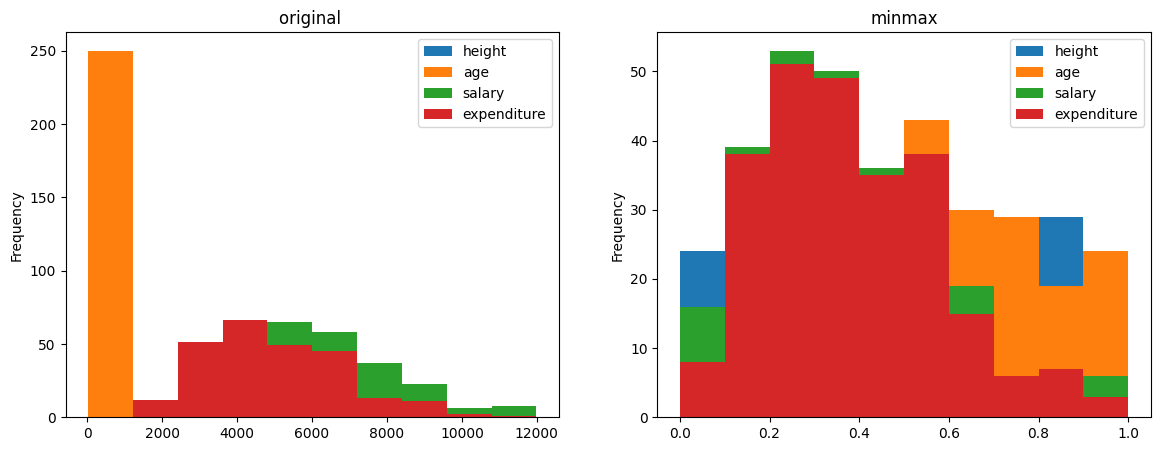

In [108]:
# 시각화 

fig, ax = plt.subplots( nrows= 1 , ncols=2, figsize=(14, 5))

ax[0].set_title('original ')
ax[1].set_title('minmax')

df_n.plot.hist(ax= ax[0] )
df_minmax.plot.hist(ax= ax[1] )
plt.show()

### 정규화

정규화: StandardScaler 모든 변수의 값을 평균이 0이고 분산이 1인 정규 분포로 변환
<br> sklearn.preprocessing / MinMaxScaler 활용

$$Z = \frac{ X - \mu }{\sigma} $$

In [109]:
# StandardScaler class
from sklearn.preprocessing import StandardScaler

In [115]:
# StandardScaler 모델링
sc_stan = StandardScaler()

In [118]:
# StandardScaler fit, transform
sc_stan.fit_transform(df_n)
df_stan = pd.DataFrame(sc_stan.fit_transform(df_n), columns=df_n.columns)
df_stan[:5]

,height,age,salary,expenditure
0,-0.625584,-1.996162,-1.222845,-1.613278
1,-0.013802,-0.954082,-0.887000,-1.077579
2,-0.103530,1.824798,0.499716,0.502599
3,-1.163952,-1.301442,-1.244513,-1.096422
4,1.552361,-1.185655,-1.065756,-0.514960


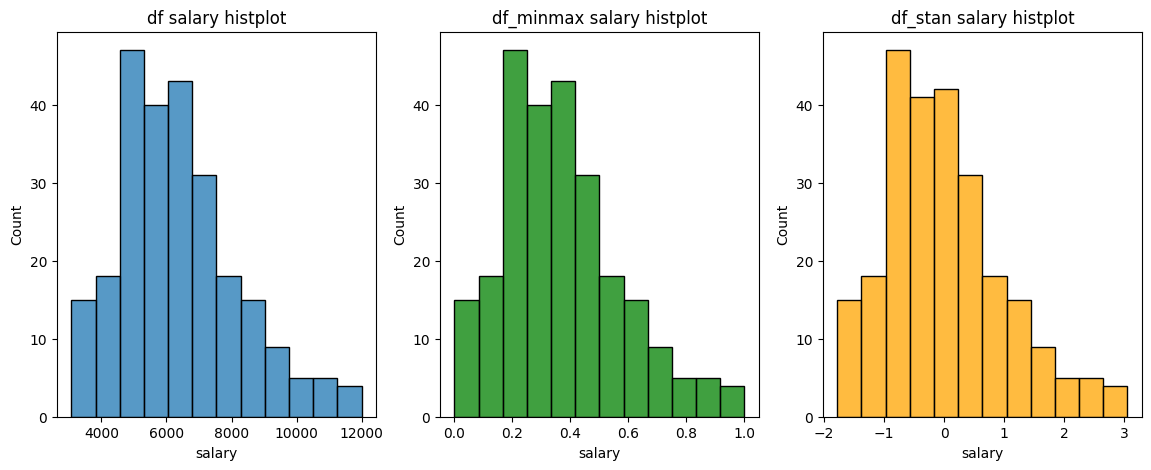

In [119]:
#시각화 
fig, ax = plt.subplots( nrows= 1 , ncols=3, figsize=(14, 5))

sns.histplot(x='salary', data=df, ax= ax[0])
sns.histplot(x='salary', data=df_minmax, ax= ax[1], color='green')
sns.histplot(x='salary', data=df_stan, ax= ax[2], color='orange')

ax[0].set_title('df salary histplot')
ax[1].set_title('df_minmax salary histplot')
ax[2].set_title('df_stan salary histplot')
plt.show()

In [120]:
# StandardScaler class
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler 모델링


In [ ]:
# StandardScaler fit, transform


### 정규화, train, test분리시 적용

- train으로 정규화 모델을 만들었을때
- test도 train 정규화 모델을 사용해야 같은 scale로 scaling된다

In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split


In [126]:
# 연속형 변수 추출
df_n1 = df_train1[['height', 'age', 'salary', 'expenditure']]
df_n1[:5]

,height,age,salary,expenditure
193,184.0,43,6530,5405
243,180.4,48,7560,6185
152,166.2,35,10410,9285
184,177.6,25,4450,3075
190,182.1,40,5800,4675


In [127]:
df_n2 = df_test1[['height', 'age', 'salary', 'expenditure']]
df_n2[:5]

,height,age,salary,expenditure
127,158.3,30,7520,6770
187,191.5,37,5620,3870
24,183.8,38,5660,4285
206,156.3,27,4160,3785
235,151.3,41,5650,3525


In [122]:
# train data StandardScaler fit까지로 StandardScaler를 만든다
from sklearn.preprocessing import StandardScaler
sc_stan1 = StandardScaler().fit(df_n1)
sc_stan1

StandardScaler()

In [125]:
# train에 대해 transform을 실행하여 train data를 StandardScaling
sc_tran_tr = sc_stan1.transform(df_n1)
sc_tran_tr[:5]

array([[ 1.18368864,  0.4262369 ,  0.09722408,  0.2420165 ],
       [ 0.89198004,  0.99132369,  0.63216424,  0.64545122],
       [-0.25864828, -0.47790198,  2.11233847,  2.24884563],
       [ 0.66509559, -1.60807557, -0.98304343, -0.96311543],
       [ 1.02973132,  0.08718482, -0.28190827, -0.13555702]])

In [128]:
# test data는 traind의 StandardScaler를 적용해 transform
sc_tran_te = sc_stan1.transform(df_n2)
sc_tran_te[:5]

array([[-0.89878658, -1.04298877,  0.61138986,  0.94802726],
       [ 1.79141487, -0.25186726, -0.37539296, -0.55192234],
       [ 1.1674826 , -0.1388499 , -0.35461858, -0.33727438],
       [-1.06084691, -1.38204085, -1.13365765, -0.59588638],
       [-1.46599773,  0.20020218, -0.35981218, -0.73036462]])

In [129]:
# train data df화
df_train_std = pd.DataFrame(sc_tran_tr, columns=df_n1.columns)
df_train_std[:5]

,height,age,salary,expenditure
0,1.183689,0.426237,0.097224,0.242016
1,0.891980,0.991324,0.632164,0.645451
2,-0.258648,-0.477902,2.112338,2.248846
3,0.665096,-1.608076,-0.983043,-0.963115
4,1.029731,0.087185,-0.281908,-0.135557


In [130]:
# test data df화
df_test_std = pd.DataFrame(sc_tran_te, columns=df_n2.columns)
df_test_std[:5]

,height,age,salary,expenditure
0,-0.898787,-1.042989,0.611390,0.948027
1,1.791415,-0.251867,-0.375393,-0.551922
2,1.167483,-0.138850,-0.354619,-0.337274
3,-1.060847,-1.382041,-1.133658,-0.595886
4,-1.465998,0.200202,-0.359812,-0.730365


In [132]:
# train data EDA
df_train_std.describe()

,height,age,salary,expenditure
count,1.750000e+02,1.750000e+02,1.750000e+02,1.750000e+02
mean,3.451208e-16,9.056248e-17,-9.643080e-17,1.865175e-16
std,1.002869e+00,1.002869e+00,1.002869e+00,1.002869e+00
min,-1.725294e+00,-2.173162e+00,-1.694566e+00,-1.865671e+00
25%,-8.663745e-01,-7.039367e-01,-7.077830e-01,-7.820870e-01
50%,-8.038192e-02,8.718482e-02,-1.520684e-01,-1.303848e-01
75%,8.879285e-01,7.652890e-01,5.724379e-01,6.881222e-01
max,1.815724e+00,1.782445e+00,2.932926e+00,3.066060e+00


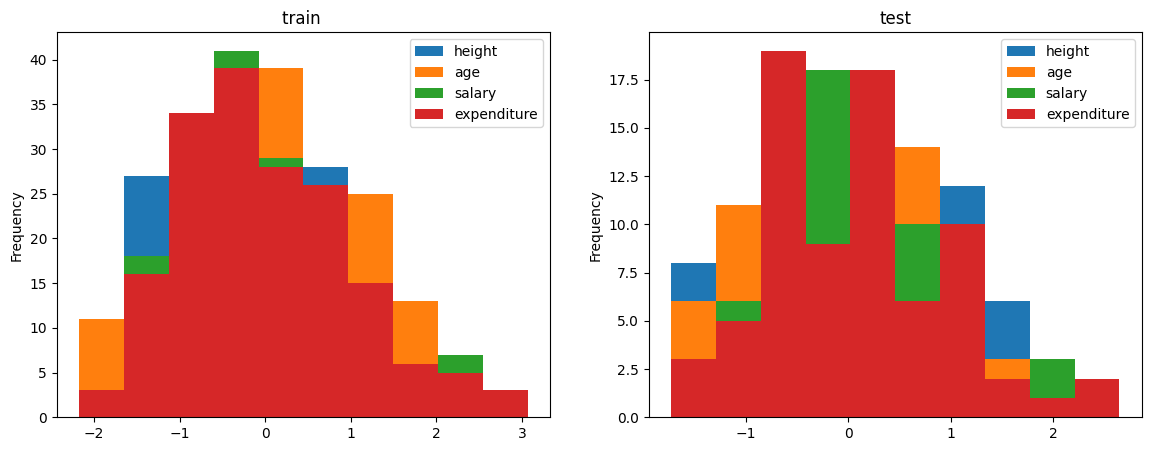

In [131]:
#시각화 
fig, ax = plt.subplots( nrows= 1 , ncols=2, figsize=(14, 5))

ax[0].set_title('train ')
ax[1].set_title('test')

df_train_std.plot.hist(ax= ax[0] )
df_test_std.plot.hist(ax= ax[1] )
plt.show()

## 4-1 Feature Engeering

변수 선택

- 종속변수(expenditure)

- 독립변수 수치형 변수중 회귀계수가 높은 2개 선정 (feature selection) 하시오
- 독립변수 수치형 변수중 t검정 통계량의 p-value가 0.05이하인것을 선정하시오


In [144]:
# ols 방식
#종속변수: 소비액 / 독립변수: 신장 / 나이 / 연봉 
from statsmodels.formula.api import ols

model_feature1 = ols(formula='expenditure ~ height + age + salary', data = df).fit()
model_feature1.summary()
# LinearRegression 방식
from sklearn.linear_model import LinearRegression
model_feature2 = LinearRegression().fit(X = df[['height', 'age', 'salary']], y = df['expenditure'])
model_feature2.feature_names_in_, model_feature2.coef_, model_feature2.intercept_

(array(['height', 'age', 'salary'], dtype=object),
 array([-0.021977  , 12.58979578,  0.94721785]),
 -1540.7354731666555)

## 4-2 Feature Engeering

보스톤 집값 데이터 셋(출처: sklearn 라이브러리) 

데이터(sklearn_boston.csv) 사이즈 : 506 X 14
<br> 
<br> <b>crim:</b> 자치시 별 1인당 범죄율
<br> <b>zn:</b> 25,000 평방피트 초과하는 거주지역 비율
<br> <b>indus:</b> 비소매상업지역 점유하고 있는 토지 비율 
<br> <b>chas:</b> 찰스강에 대한 더미 변수(강 경계 1, 아니면 0) 
<br> <b>nox:</b> 10ppm 당 농축 일산화 질소
<br> <b>rm:</b> 주택 1가구당 평균 방의 개수 
<br> <b>age:</b> 1940년 이전 건축된 소유주택 비율
<br> <b>dis:</b> 5개 보스턴 직업센터까지의 접근성 지수 
<br> <b>rad:</b> 방사형 도로까지의 접근성 지수 
<br> <b>tax:</b> 10,000 달러 당 재산세 율
<br> <b>ptratio:</b> 자치시 별 학생 / 교사 비율 
<br> <b>b:</b> 자치시별 흑인의 비율 
<br> <b>lstat:</b> 모집단 하위계층 비율 
<br> <b>price:</b> 본인 소유 주택 가격 

<br> 1. 종속변수 : price
<br> 2. 독립변수 : price를 제외한 모든 변수
<br> 3. feature selection을 통해 p-value 값 0.05 미만 / coef 절대값 0.5이상인 변수를 선택하시오
<br> ------------------------------------------------------------------------------------------
<br> 4. train, test 분리하여 다음을 수행 (train_size=0.8, random_state=123)
<br> 5. 선택된 독립변수를 사용하여 선형회귀식을 만들고 RMSE를 구하시오 

In [145]:
# 파일 로드 
boston = pd.read_csv('.\\data\\sklearn_boston.csv')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [146]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [147]:
# step1) 변수 생성
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'price'],
      dtype='object')

In [148]:
# join
' + '.join(boston.columns)
'A' + ' + '.join(boston.columns.drop('price'))
'price ~ ' + ' + '.join(boston.columns.drop('price'))

'price ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + b + lstat'

In [149]:
'price ~ ' + ' + '.join(boston.columns.drop('price'))

'price ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + b + lstat'

In [164]:
# step2) formula 생성
form_boston = 'price ~ ' + ' + '.join(boston.columns.drop('price'))

In [182]:
# step3) feature selection을 통해 p-value 값 0.05 미만 / coef 절대값 0.5이상인 변수를 선택하시오
# ols, fit, summary
from statsmodels.formula.api import ols
model_boston = ols(formula=form_boston, data = boston).fit()

In [183]:
model_boston.params

Intercept    36.459488
crim         -0.108011
zn            0.046420
indus         0.020559
chas          2.686734
nox         -17.766611
rm            3.809865
age           0.000692
dis          -1.475567
rad           0.306049
tax          -0.012335
ptratio      -0.952747
b             0.009312
lstat        -0.524758
dtype: float64

In [176]:
# p-value 값 0.05 미만 / coef 절대값 0.5이상인 변수를 선택

#model_boston.params
#model_boston.params.abs() > 0.5
#model_boston.pvalues.round(3) < 0.05
#(model_boston.params.abs() > 0.5) & (model_boston.pvalues.round(3) < 0.05)
model_boston.params.index[(model_boston.params.abs() > 0.5) & (model_boston.pvalues.round(3) < 0.05)]

Index(['Intercept', 'chas', 'nox', 'rm', 'dis', 'ptratio', 'lstat'], dtype='object')

In [ ]:
Intercept, chas, nox, rm, dis, ptratio, lstat

In [194]:
# step4) train, test 분리(train_size=0.8, random_state=123)

df_train2, df_test2 = train_test_split(boston, train_size=0.8, random_state=123)
len(df_train2), len(df_test)

(404, 102)

In [188]:
# formula 생성
temp = model_boston.params.index[(model_boston.params.abs() > 0.5) & (model_boston.pvalues.round(3) < 0.05)]
form_boston2 = 'price ~ ' + ' + '.join(temp.drop('Intercept'))
form_boston2

'price ~ chas + nox + rm + dis + ptratio + lstat'

In [204]:
# step5) 선택된 독립변수를 사용하여 선형회귀식 생성
from statsmodels.formula.api import ols
model4_2 = ols(formula = form_boston2, data = df_train2).fit()
pred4_2 = model4_2.predict(df_test2)

In [205]:
# summary
model4_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     183.9
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          2.58e-111
Time:                        13:57:04   Log-Likelihood:                -1201.4
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     397   BIC:                             2445.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.6255      4.904      6.449      0.000      21.984      41.267
chas           1.9577      1.043      1.877      0.061      -0.093       4.008
nox          -15.4898      3.478     -4.454      0.000     -22.327      -8.653
rm             4.5610      0.432     10.554      0.000       3.711       5.411
dis           -1.0654      0.175     -6.071      0.000      -1.410      -0.720
ptratio       -0.9606      0.123     -7.832      0.000      -1.202      -0.719
lstat         -0.5956      0.051    -11.589      0.000      -0.697      -0.495
==============================================================================
Omnibus:                      150.695   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              692.268
Skew:                           1.567   Prob(JB):                    4.74e-151
Kurtosis:                       8.595   Cond. No.                         547.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [206]:
# step5) RMSE
mean_squared_error(df_test2['price'], pred4_2) ** 0.5

5.6044574962178615

## 4-3 Feature Engeering - 다중 공선성 VIF

In [198]:
boston[:5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [207]:
# 상관관계 분석
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


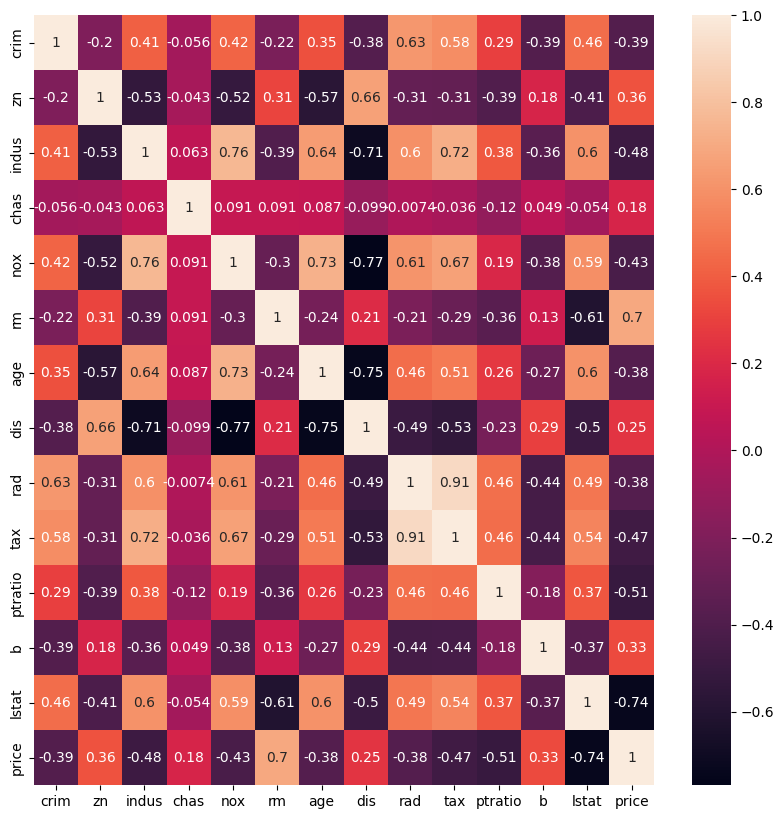

In [209]:
# 상관관계 매트릭스 시각화 
plt.figure( figsize=(10, 10))
sns.heatmap(boston.corr(), annot=True , cbar=True)
plt.show()

In [212]:
vif = pd.DataFrame()
vif
boston.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [211]:
#다중 공선성 VIF 구하기 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(boston.values, i) for i in range(boston.shape[1])]
vif["features"] = boston.columns
vif.sort_values('VIF Factor', ascending = False)

,VIF Factor,features
5,136.101743,rm
10,87.227233,ptratio
4,74.004269,nox
9,61.939713,tax
13,24.503206,price
6,21.398863,age
11,21.351015,b
7,15.430455,dis
8,15.369980,rad
2,14.485874,indus


##  $\Sigma$ (시그마) Quiz

### quiz 1) 자전거공유플랫폼 데이터 셋 활용

□ df_bike.csv 파일을 읽고 (데이터 객체명 : df_bike)
train, test로 분리하시오 (random_state=123)

  - sklearn.model_selection / train_test_split 메소드를 쓸 것(데이터셋은 df_bike_train, df_bike_test로 명명)

  1_1. df_bike_train내 대여건수인 'riders' 변수와 'temp', 'feelslike', 'humidity', 'windspeed', 'casual'
    <br> 간 pearson 상관계수를 확인, 'riders' 변수와 비교해 가장 상관계수 절대값이 큰 변수를 구하시오

- df_bike_train으로 자건거 대여건수(riders)와 'temp'변수와 단일 회귀분석을 실시하고 

  1_2. 회귀계수를 구하시오

  1_3. df_bike_test의 대여건수를 예측(pred_count)하고, 예측치의 중앙값을 구하시오

  1_4. df_bike_test의 대여건수 예측치(pred_count)와 실제값(riders)의 RMSE를 구하시오

  1_5. df_bike_train의 자건거 대여건수(riders)를 종속변수로 하고, 'temp', 'feelslike', 'humidity', 'windspeed', 'casual'
  
    5개 독립변수로 다중 회귀분석을 하고자 한다.
    
    
    이때 해당 모델의 결정계수를 구하고 통계적으로 유의미한 변수와 해당변수의 회귀값을 구하시오  

** bike dataset 설명
https://www.scikit-yb.org/en/latest/api/datasets/bikeshare.html

In [ ]:
# 파일 로딩 
df_bike = pd.read_csv('.\\data\\yellowbrick_bikeshare.csv')

# # 데이터 분리 
from sklearn.model_selection import train_test_split
df_bike_train, df_bike_test = train_test_split(df_bike, train_size= 0.7, random_state=123)
print('df', len(df_bike), 'df_bike_train', len(df_bike_train), 'df_bike_test', len(df_bike_test))

df_bike_train[['riders', 'temp', 'feelslike', 'humidity', 'windspeed', 'casual']].corr().abs().sort_values('riders', ascending=False)
# casual, 0.695529

In [ ]:
# 관련 메소드 호출
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# 1_2. 모델 Training, 회귀계수 (statemodels)

# # OLS 모델, 1_2. 모델 Training, 회귀계수 (statemodels)

# 1_2. 모델 Training, 회귀계수 (sklearn)    
from sklearn.linear_model import LinearRegression

# 1_3. df_bike_test 예측치의 중앙값을 구하시오

# 1_4. df_bike_test pred_count와 count의 RMSE

# 1_5. feature selection


## quiz 2) 다이아몬드 데이터 셋 활용

- diamond.csv 파일을 읽고 (df_dia)
train, test로 분리하시오 (random_state=123) (df_dia_train, df_dia_test)

- df_dia_train으로 선형회귀분석을 실시하고 아래에 답하시오

  2_1. 종속변수(price), 독립변수(carat, depth)일때 독립변수의 회귀계수를 구하시오

  2_2. 종속변수(price), 독립변수(carat, depth, color)일때 df_dia_test price의 예측값 평균을 구하시오

    'color'는 더미변수로 변형하고 가변수를 생성시 마지막 변수 하나를 제거하시오 

  2_3. 2_2 조건으로 df_dia_test의 값이 (carat: 1, color: 'E' , depth: 50)일때 price 예측값을 구하시오 

** dia dataset 설명 https://www.kaggle.com/datasets/shivam2503/diamonds

In [ ]:
# 파일 로딩 
df_dia = pd.read_csv('.\\data\\diamonds.csv')

# 데이터 분리 
from sklearn.model_selection import train_test_split
df_dia_train, df_dia_test = train_test_split(df_dia, train_size= 0.7, random_state=123)
print('df', len(df_dia), 'df_dia_train', len(df_dia_train), 'df_dia_test', len(df_dia_test))
df_dia.head(5)

In [ ]:
# 관련 메소드 호출
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# 2_1. 모델 Training, 회귀계수 (statemodels)

# 2_1. 모델 Training, 회귀계수 (sklearn)    
# X, y값 세팅

# 2_2. 범주형 data 가변수화  

# 데이터 분리 
from sklearn.model_selection import train_test_split

# X, y값 세팅  ['carat', 'depth', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I'] ['price']

# LinearRegression, fit, predict
from sklearn.linear_model import LinearRegression

# 2_2. answer (mean)

# 2_3. 독립변수 직접입력 방식
# df_dia_test(carat: 1, depth: 50, color: 'E'  )일때 price 예측값

# 2_3. answer 


## $\Omega$(오메가) Quiz

- yellowbrick_bikeshare.csv 파일을 읽고 (객체명 : df_bike)

  3-1 season column을 사용하여 여름(df_bike_summer)과 겨울(df_bike_winter)로 구분하시오

  3_2 df_bike_summer, df_bike_winter를  train, test로 분리하시오 (df_summer_tr, df_summer_te, df_winter_tr, df_winter_te, random_state=123 )

  3_3. statemodels를 사용하여 종속변수(riders), 독립변수(temp)로 train 시키고 여름과 겨울의 RMSE차이를 구하시오

In [ ]:
# 파일 로딩 
df_bike = pd.read_csv('.\\data\\yellowbrick_bikeshare.csv')

# 3-1 데이터 분리

# 3-2 train, test 분리

from sklearn.model_selection import train_test_split

# 3-3 train, predict
from statsmodels.formula.api import ols


# 3-3 RMSE


In [ ]:
#시각화 
fig, ax = plt.subplots( nrows= 1 , ncols=2, figsize=(14, 5))

sns.regplot(x='temp', y='riders', data=df_summer_tr, ax= ax[0], color='green')
sns.regplot(x='temp', y='riders', data=df_winter_tr, ax= ax[1])

ax[0].set_title('df_summer_tr')
ax[1].set_title('df_winter_tr')
plt.show()